- 프로젝트 목적
1. 공정별 부하를 확인하고 최적화 할 수 있는 방안?
2. 공정 흐름에 따른 불량 발생을 확인, 주요 영향 인자를 확인하기
3. 데이터 모델링 : 영향인자를 고려한 합리적인 추론이 필요함
    
- 공정의 기본인 QCD
비즈니스 문제해결에 사용될 데이터 : '품질' / CMOS 소자 제작
- 불량을 사전에 예측하여, 품질을 향상할 수 있는 조업조건 구성
기존 : 불량을 찾음 / 현재: 품질을 만들어 감
        
- 반도체 8대 공정
1. Wafer 웨이퍼
반도체 집적회로를 만드는데 사용하는 재료
2. Oxidation 산화
웨이퍼 표면에 산화막을 형성, 트렌지스터 기초를 만드는 과정
3. Photo 포토
웨이퍼 위에 반도체 회로를 그려넣는 과정
4. Etching 식각
반도체 구조 형성 패턴을 만드는 과정
5. Deposition 증착/이온 주입
증착 : 회로 구분 연결 보호 역할을 하는 박막(TFT)
이온 : 전기적 특성 주입과정 .. 반도체 전기적 특성을 갖도록
6. Metalization 금속 배정 공정
전기적 신호가 잘 전달되도록 하는 과정
7. Electrical Die Sorting (EDS)
검사
8. Packing 패키징

금 분석 데이터는

Oxidation, Photo(spin coat + soft bake), Etching , Electrical Die Sorting / Implantation 파일로 구성


-------------------------------------------------------------
- 공정간 챔버 이동 후 품질검사의 과정에서 챔버별 부하가 생성. 
-------------------------------------------------------------


In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt # 그래프 출력

import seaborn as sns

# 그래프 설정 한글폰트
if os.name == 'nt': # 윈도우 사용자
    mpl.rc('font', family = 'Malgun Gothic')
elif os.name == 'posix': # 맥 사용자
    mpl.rc('font', family = 'AppleGothic')
else:
    print('check your os')
    
# 그래프의 한글을 선명하게
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프에서 음수값 나올 때, 깨지는 현상 방지
mpl.rc('axes', unicode_minus = False)

import warnings
warnings.filterwarnings('ignore')
# 라이브러리
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest


C:\Users\user\AppData\Local\Temp/ipykernel_15176/907400617.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
import pandas_profiling

In [3]:
path = 'C:/Users/user/Desktop/TodayLearn/TiL/Code/Project1/DATA'

In [4]:
df_raw = pd.read_csv(f'{path}/Oxid_000.csv')
df_raw.shape

(852, 13)

In [5]:
df_raw.head(10)

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime
0,1,Oxidation,dry,1138.979159,O2,32.80,0.200,62,699.443,NOLSM111,1,1,17-02-2019 PM 9:04:30
1,1,Oxidation,dry,1218.184551,O2,31.86,0.194,137,696.792,NOLSM212,1,2,17-02-2019 PM 9:04:30
2,1,Oxidation,dry,1062.467808,O2,39.51,0.217,128,705.471,NOLSM313,1,3,17-02-2019 PM 9:04:30
3,1,Oxidation,dry,1114.704773,O2,32.88,0.201,90,710.772,NOLSM414,1,4,17-02-2019 PM 9:04:30
4,1,Oxidation,dry,989.411946,O2,38.11,0.204,98,716.975,NOLSM515,1,5,17-02-2019 PM 9:04:30
5,1,Oxidation,wet,979.109703,H2O,39.93,0.204,132,698.725,NOLSM616,1,6,17-02-2019 PM 9:04:30
6,1,Oxidation,wet,1136.114954,H2O,35.63,0.200,74,709.703,NOLSM717,1,7,17-02-2019 PM 9:04:30
7,1,Oxidation,dry,1096.241849,O2,28.60,0.199,291,696.438,NOLSM818,1,8,17-02-2019 PM 9:04:30
8,2,Oxidation,dry,1042.243992,O2,34.58,0.203,61,712.977,NOLSM919,1,9,17-02-2019 PM 9:04:30
9,2,Oxidation,dry,1104.836285,O2,34.95,0.204,117,725.873,NOLSM10110,1,10,17-02-2019 PM 9:04:30


In [6]:
df_raw.sort_values(by = 'thickness', ascending = False)

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime
175,1,Oxidation,wet,1011.354551,H2O,33.77,0.209,145,737.402,NOLSM176714,7,14,17-02-2019 PM 9:04:30
443,3,Oxidation,wet,1108.356271,H2O,40.49,0.196,94,732.934,NOLSM4441712,17,12,17-02-2019 PM 9:04:30
407,2,Oxidation,wet,871.217472,H2O,40.05,0.210,45,731.855,NOLSM408163,16,3,17-02-2019 PM 9:04:30
82,2,Oxidation,dry,1037.156662,O2,29.54,0.217,172,731.528,NOLSM8342,4,2,17-02-2019 PM 9:04:30
690,3,Oxidation,wet,1274.307552,H2O,44.97,0.225,32,729.613,NOLSM6912616,26,16,17-02-2019 PM 9:04:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,1,Oxidation,dry,978.149281,O2,35.26,0.202,-2,687.497,NOLSM3341310,13,10,17-02-2019 PM 9:04:30
267,3,Oxidation,dry,1188.182381,O2,34.90,0.219,147,686.747,NOLSM2681025,10,25,17-02-2019 PM 9:04:30
761,2,Oxidation,wet,1268.333781,H2O,44.53,0.191,-2,686.530,NOLSM762296,29,6,17-02-2019 PM 9:04:30
200,1,Oxidation,dry,1066.207388,O2,27.50,0.217,78,683.976,NOLSM201812,8,12,17-02-2019 PM 9:04:30


In [7]:
# 산화막 공정 과정에서 Thickness 가 700nm 미만인 데이터는 이상치에 속하므로, 서로 분리해서 두개의 프레임을 제작.
df_raw.isnull().sum()

Ox_Chamber    0
process       0
type          0
Temp_OXid     0
Vapor         0
ppm           0
Pressure      0
Oxid_time     0
thickness     0
No_Die        0
Lot_Num       0
Wafer_Num     0
Datetime      0
dtype: int64

In [8]:
ls = []
for data in df_raw['thickness'] :
    if data >= 700 : # thickness > 700
        ls.append('True')
    else : 
        ls.append('False')
        
df_raw['Reinforcement'] = ls

df_raw

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime,Reinforcement
0,1,Oxidation,dry,1138.979159,O2,32.80,0.200,62,699.443,NOLSM111,1,1,17-02-2019 PM 9:04:30,False
1,1,Oxidation,dry,1218.184551,O2,31.86,0.194,137,696.792,NOLSM212,1,2,17-02-2019 PM 9:04:30,False
2,1,Oxidation,dry,1062.467808,O2,39.51,0.217,128,705.471,NOLSM313,1,3,17-02-2019 PM 9:04:30,True
3,1,Oxidation,dry,1114.704773,O2,32.88,0.201,90,710.772,NOLSM414,1,4,17-02-2019 PM 9:04:30,True
4,1,Oxidation,dry,989.411946,O2,38.11,0.204,98,716.975,NOLSM515,1,5,17-02-2019 PM 9:04:30,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,NOLSM8483211,32,11,17-02-2019 PM 9:04:30,True
848,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,NOLSM8493212,32,12,17-02-2019 PM 9:04:30,True
849,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,NOLSM8503213,32,13,17-02-2019 PM 9:04:30,True
850,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,NOLSM8513214,32,14,17-02-2019 PM 9:04:30,True


In [9]:
df_raw.pivot_table(index = 'Reinforcement', values = ['Oxid_time', 'Pressure', 'Temp_OXid', 'ppm'], aggfunc = 'mean')

,Oxid_time,Pressure,Temp_OXid,ppm
Reinforcement,,,,
False,105.890244,0.206524,1082.455629,34.090732
True,125.045455,0.211891,1062.494658,33.107623


In [10]:
# photo 과정에서 Lind CD(lithography distace 값의 통계적 오류 확인 / Out of Range / 적정 25 `~ 55

In [11]:
df_lit = pd.read_csv(f'{path}/Photo_lithography_000.csv')
df_soft = pd.read_csv(f'{path}/Photo_Softbake_000.csv')
df_lit['Range_check'] = np.where((df_lit['Line_CD'] >= 25.0) & (df_lit['Line_CD'] <= 55.0), True, False)

df_lit.pivot_table(index = 'Range_check', columns = 'UV_type', values = 'Line_CD', aggfunc = 'count')

UV_type,G,H,I
Range_check,,,
False,45,93,48
True,267,192,206


In [12]:
df_lit.sort_values(by = 'Line_CD', ascending = True).head(5)

,lithography_Chamber,Line_CD,Lamp,UV_type,Wavelength,Resolution,Energy_Exposure,No_Die,Lot_Num,Wafer_Num,Datetime,Range_check
329,2,4.562,Hg-Arc,I,365,539.753,107.797,NOLSM330136,13,6,17-02-2019 PM 9:04:30,False
147,1,6.197,Hg-Arc,H,405,490.508,109.468,NOLSM148613,6,13,17-02-2019 PM 9:04:30,False
230,1,8.101,Hg-Arc,G,436,518.953,104.841,NOLSM231915,9,15,17-02-2019 PM 9:04:30,False
179,1,12.635,Hg-Arc,G,436,507.826,103.407,NOLSM180718,7,18,17-02-2019 PM 9:04:30,False
463,1,13.721,Hg-Arc,G,436,553.497,107.293,NOLSM464185,18,5,17-02-2019 PM 9:04:30,False


In [13]:
#3. Etching Process

In [14]:
df_etch = pd.read_csv(f'{path}/Etching_000.csv')
df_etch.shape
df_etch

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1
0,0,3,Etching,70.878,50.851,1.047,NOLSM111,1,1,17-02-2019 PM 9:04:30,251.0,267.06,303.82,361.38
1,1,2,Etching,69.561,52.283,1.051,NOLSM212,1,2,17-02-2019 PM 9:04:30,317.0,332.74,369.31,426.11
2,2,1,Etching,70.968,51.610,1.017,NOLSM313,1,3,17-02-2019 PM 9:04:30,411.0,424.21,460.65,517.80
3,3,1,Etching,70.146,51.286,1.027,NOLSM414,1,4,17-02-2019 PM 9:04:30,256.0,272.28,308.56,365.93
4,4,2,Etching,71.174,51.996,1.050,NOLSM515,1,5,17-02-2019 PM 9:04:30,419.0,434.98,471.65,528.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,847,3,Etching,71.550,50.601,1.015,NOLSM8483211,32,11,17-02-2019 PM 9:04:30,177.0,192.10,228.65,285.91
848,848,3,Etching,70.718,50.424,1.011,NOLSM8493212,32,12,17-02-2019 PM 9:04:30,180.0,194.33,230.76,287.66
849,849,2,Etching,71.295,50.602,1.015,NOLSM8503213,32,13,17-02-2019 PM 9:04:30,142.0,156.72,193.21,250.21
850,850,1,Etching,71.199,50.544,1.014,NOLSM8513214,32,14,17-02-2019 PM 9:04:30,127.0,140.41,176.87,234.09


In [59]:
tf = ['Thin Film 4', 'Thin Film 3', 'Thin Film 2', 'Thin Film 1']

for idx in tf :
    for data in df_etch[idx] :
        if data <= 150 :
            df_etch[idx].replace(data, np.nan, inplace = True) 
            

In [60]:
df_etch.isnull().sum()

Unnamed: 0          0
Etching_Chamber     0
Process 3           0
Temp_Etching        0
Source_Power        0
Selectivity         0
No_Die              0
Lot_Num             0
Wafer_Num           0
Datetime            0
Thin Film 4        84
Thin Film 3        48
Thin Film 2        16
Thin Film 1         7
Etching rate       78
dtype: int64

In [61]:
df_etch['Etching rate'] = (df_etch['Thin Film 1'] - df_etch['Thin Film 4']) / 30
df_etch

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Etching rate
0,0,3,Etching,70.878,50.851,1.047,NOLSM111,1,1,17-02-2019 PM 9:04:30,251.0,267.06,303.82,361.38,3.679333
1,1,2,Etching,69.561,52.283,1.051,NOLSM212,1,2,17-02-2019 PM 9:04:30,317.0,332.74,369.31,426.11,3.637000
2,2,1,Etching,70.968,51.610,1.017,NOLSM313,1,3,17-02-2019 PM 9:04:30,411.0,424.21,460.65,517.80,3.560000
3,3,1,Etching,70.146,51.286,1.027,NOLSM414,1,4,17-02-2019 PM 9:04:30,256.0,272.28,308.56,365.93,3.664333
4,4,2,Etching,71.174,51.996,1.050,NOLSM515,1,5,17-02-2019 PM 9:04:30,419.0,434.98,471.65,528.85,3.661667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,847,3,Etching,71.550,50.601,1.015,NOLSM8483211,32,11,17-02-2019 PM 9:04:30,177.0,192.10,228.65,285.91,3.630333
848,848,3,Etching,70.718,50.424,1.011,NOLSM8493212,32,12,17-02-2019 PM 9:04:30,180.0,194.33,230.76,287.66,3.588667
849,849,2,Etching,71.295,50.602,1.015,NOLSM8503213,32,13,17-02-2019 PM 9:04:30,NaN,156.72,193.21,250.21,NaN
850,850,1,Etching,71.199,50.544,1.014,NOLSM8513214,32,14,17-02-2019 PM 9:04:30,NaN,NaN,176.87,234.09,NaN


In [18]:
# 이온공정 implanation

In [19]:
df_imp = pd.read_csv(f'{path}/Implant_000.csv')


df_imp.isnull().sum()

Chamber_Num          0
process4             0
Flux60s              1
Flux90s              1
Flux160s             1
Flux480s             0
Flux840s             0
input_Energy         0
Current              0
Temp_implantation    0
Furance_Temp         1
RTA_Temp             0
No_Die               0
Lot_Num              0
Wafer_Num            0
Datetime             0
dtype: int64

In [20]:
#condition = (df4 < 0).any(1)

df_imp['Flux60s'] = np.where(df_imp['Flux60s']<0, np.NaN, df_imp['Flux60s'])
df_imp['Flux90s'] = np.where(df_imp['Flux90s']<0, np.NaN, df_imp['Flux90s'])
df_imp['Flux160s'] = np.where(df_imp['Flux160s']<0, np.NaN, df_imp['Flux160s'])
df_imp['Flux480s'] = np.where(df_imp['Flux480s']<0, np.NaN, df_imp['Flux480s'])
df_imp['Flux840s'] = np.where(df_imp['Flux840s']<0, np.NaN, df_imp['Flux840s'])

In [21]:
df_imp.isnull().sum()

Chamber_Num          0
process4             0
Flux60s              1
Flux90s              9
Flux160s             5
Flux480s             0
Flux840s             0
input_Energy         0
Current              0
Temp_implantation    0
Furance_Temp         1
RTA_Temp             0
No_Die               0
Lot_Num              0
Wafer_Num            0
Datetime             0
dtype: int64

In [22]:
#5 Quality inspection

In [23]:
df_ins = pd.read_csv(f'{path}/Inspect_000.csv')

In [24]:
df_ins['target_binom'] = np.where(df_ins['Error_message'] == 'none',  0, 1)
df_ins['target_binom'].value_counts()

0    786
1     66
Name: target_binom, dtype: int64

In [25]:
#df_result = df_raw.join(df2, on = 'No_Die', how = 'left')
# 데이터 타입 다른 데이터에 대해서 합치는 작업이 필요함.

In [62]:
result = pd.merge(df_raw, df_soft, how = 'left', on = 'No_Die' )
result.shape

(852, 32)

In [63]:
result2 = pd.merge(result, df_lit, how = 'left', on = 'No_Die')
result2.shape

(852, 43)

In [64]:
result3 = pd.merge(result2, df_etch, how = 'left', on = 'No_Die')
result4 = pd.merge(result3, df_imp, how = 'left', on = 'No_Die')
result5 = pd.merge(result4, df_ins, how = 'left', on = 'No_Die')

In [29]:
#merged = pd.merge(data1, data2, how='left', on=['name_', 'artists_']) # 테이블 병합
#table = merge.loc[merge['danceability'].notnull()

result5.isnull().sum()

Ox_Chamber       0
process          0
type             0
Temp_OXid        0
Vapor            0
                ..
Wafer_Num_y      0
Datetime_y       0
Error_message    0
Wafer_map        0
target_binom     0
Length: 79, dtype: int64

In [65]:
list(result5.columns)

['Ox_Chamber',
 'process',
 'type',
 'Temp_OXid',
 'Vapor',
 'ppm',
 'Pressure',
 'Oxid_time',
 'thickness',
 'No_Die',
 'Lot_Num_x',
 'Wafer_Num_x',
 'Datetime_x',
 'Reinforcement',
 'Unnamed: 0_x',
 'photo_soft_Chamber',
 'process 2',
 'resist_target',
 'N2_HMDS',
 'pressure_HMDS',
 'temp_HMDS',
 'temp_HMDS_bake',
 'time_HMDS_bake',
 'spin1',
 'spin2',
 'spin3',
 'photoresist_bake',
 'temp_softbake',
 'time_softbake',
 'Lot_Num_y',
 'Wafer_Num_y',
 'Datetime_y',
 'lithography_Chamber',
 'Line_CD',
 'Lamp',
 'UV_type',
 'Wavelength',
 'Resolution',
 'Energy_Exposure',
 'Lot_Num_x',
 'Wafer_Num_x',
 'Datetime_x',
 'Range_check',
 'Unnamed: 0_y',
 'Etching_Chamber',
 'Process 3',
 'Temp_Etching',
 'Source_Power',
 'Selectivity',
 'Lot_Num_y',
 'Wafer_Num_y',
 'Datetime_y',
 'Thin Film 4',
 'Thin Film 3',
 'Thin Film 2',
 'Thin Film 1',
 'Etching rate',
 'Chamber_Num',
 'process4',
 'Flux60s',
 'Flux90s',
 'Flux160s',
 'Flux480s',
 'Flux840s',
 'input_Energy',
 'Current',
 'Temp_implanta

In [30]:
# df_raw, df_lit, df_soft, df_etch, df_imp, df_ins

In [31]:
df_raw.head(2)

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime,Reinforcement
0,1,Oxidation,dry,1138.979159,O2,32.80,0.200,62,699.443,NOLSM111,1,1,17-02-2019 PM 9:04:30,False
1,1,Oxidation,dry,1218.184551,O2,31.86,0.194,137,696.792,NOLSM212,1,2,17-02-2019 PM 9:04:30,False


In [32]:
df_lit.head(2)

,lithography_Chamber,Line_CD,Lamp,UV_type,Wavelength,Resolution,Energy_Exposure,No_Die,Lot_Num,Wafer_Num,Datetime,Range_check
0,1,30.959,Hg-Arc,H,405,516.657,109.769,NOLSM111,1,1,17-02-2019 PM 9:04:30,True
1,2,29.653,Hg-Arc,H,405,501.894,107.102,NOLSM212,1,2,17-02-2019 PM 9:04:30,True


In [33]:
df_soft.head(2)

,Unnamed: 0,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,No_Die,Lot_Num,Wafer_Num,Datetime
0,0,1,Photo,1.21194,13.891,15.025,20.000,198.792,90.001,504.589,4082.622,5184.620,5.044,90.894,30.009,NOLSM111,1,1,17-02-2019 PM 9:04:30
1,1,1,Photo,0.88772,14.722,15.059,19.995,198.747,89.998,492.196,3960.739,5065.197,5.058,92.334,29.997,NOLSM212,1,2,17-02-2019 PM 9:04:30


In [34]:
df_etch.head(2)

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Etching rate
0,0,3,Etching,70.878,50.851,1.047,NOLSM111,1,1,17-02-2019 PM 9:04:30,251.0,267.06,303.82,361.38,3.679333
1,1,2,Etching,69.561,52.283,1.051,NOLSM212,1,2,17-02-2019 PM 9:04:30,317.0,332.74,369.31,426.11,3.637000


In [35]:
df_ins.head(2)

,Target,No_Die,Lot_Num,Wafer_Num,Datetime,Error_message,Wafer_map,target_binom
0,96,NOLSM111,1,1,02-18-2018,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,0
1,102,NOLSM212,1,2,02-18-2018,none,[[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...,0


In [36]:
df_imp.head(2)

,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Current,Temp_implantation,Furance_Temp,RTA_Temp,No_Die,Lot_Num,Wafer_Num,Datetime
0,3,Implantation,9.997373e+15,1.346079e+17,3.468281e+17,3.002593e+17,6.000007e+17,31574.410,0.01,102.847,885.0,154,NOLSM111,1,1,17-02-2019 ?? 9:04:30
1,2,Implantation,9.705928e+15,1.389326e+17,3.838008e+17,3.017903e+17,6.000012e+17,31580.213,0.01,104.323,919.0,154,NOLSM212,1,2,17-02-2019 ?? 9:04:30


In [37]:
result5.T.head(60)

,0,1,2,3,4,5,6,7,8,9,...,842,843,844,845,846,847,848,849,850,851
Ox_Chamber,1,1,1,1,1,1,1,1,2,2,...,3,3,3,3,3,3,1,1,1,1
process,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,...,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation,Oxidation
type,dry,dry,dry,dry,dry,wet,wet,dry,dry,dry,...,wet,wet,wet,wet,wet,wet,wet,wet,wet,wet
Temp_OXid,1138.979159,1218.184551,1062.467808,1114.704773,989.411946,979.109703,1136.114954,1096.241849,1042.243992,1104.836285,...,1269.454003,1273.698908,1272.216734,1280.687973,1275.153349,1275.182502,1268.105427,1279.160563,1272.804948,1278.097085
Vapor,O2,O2,O2,O2,O2,H2O,H2O,O2,O2,O2,...,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O,H2O
ppm,32.8,31.86,39.51,32.88,38.11,39.93,35.63,28.6,34.58,34.95,...,44.96,44.9,45.16,45.19,45.08,45.1,45.07,45.12,45.34,45.26
Pressure,0.2,0.194,0.217,0.201,0.204,0.204,0.2,0.199,0.203,0.204,...,0.217,0.216,0.214,0.214,0.215,0.214,0.215,0.214,0.213,0.215
Oxid_time,62,137,128,90,98,132,74,291,61,117,...,24,23,21,21,22,21,22,21,20,22
thickness,699.443,696.792,705.471,710.772,716.975,698.725,709.703,696.438,712.977,725.873,...,706.242,712.373,710.456,708.586,712.936,715.498,707.179,712.946,711.987,716.238
No_Die,NOLSM111,NOLSM212,NOLSM313,NOLSM414,NOLSM515,NOLSM616,NOLSM717,NOLSM818,NOLSM919,NOLSM10110,...,NOLSM843326,NOLSM844327,NOLSM845328,NOLSM846329,NOLSM8473210,NOLSM8483211,NOLSM8493212,NOLSM8503213,NOLSM8513214,NOLSM8523215


In [38]:
cham_num = ['Ox_Chamber', 'photo_soft_Chamber', 'lithography_Chamber', 'Etching_Chamber', 'Chamber_Num']

rs = 'route_'
result5['Chamber Route'] = rs + result5['Ox_Chamber'].apply(str) + result5['photo_soft_Chamber'].apply(str) + result5['lithography_Chamber'].apply(str) 

In [39]:
result5['Chamber Route']  = result5['Chamber Route']  + result5['Etching_Chamber'].apply(str) + result5['Chamber_Num'].apply(str)

In [40]:
result5['Chamber Route'].head(20)

0     route_11133
1     route_11222
2     route_11311
3     route_12111
4     route_12222
5     route_12333
6     route_13222
7     route_13311
8     route_21111
9     route_21222
10    route_21333
11    route_22133
12    route_22222
13    route_22311
14    route_23111
15    route_23222
16    route_23333
17    route_31133
18    route_31222
19    route_31311
Name: Chamber Route, dtype: object

In [41]:
df3 = result5.drop(columns = ['Lot_Num_x', 'Wafer_Num_x', 'Datetime_x', 'Lot_Num_y', 'Wafer_Num_y', 'Datetime_y', 'Lamp', 'Wafer_map', 'Current'])

In [42]:
print(df3.shape)

(852, 59)


In [43]:
df3.to_csv('preprocessing_data.csv')

In [44]:
#14. Oxidation 과정의 보강 여부에 따른, Oxidation Time의 유의미한 차이

In [45]:
%matplotlib inline

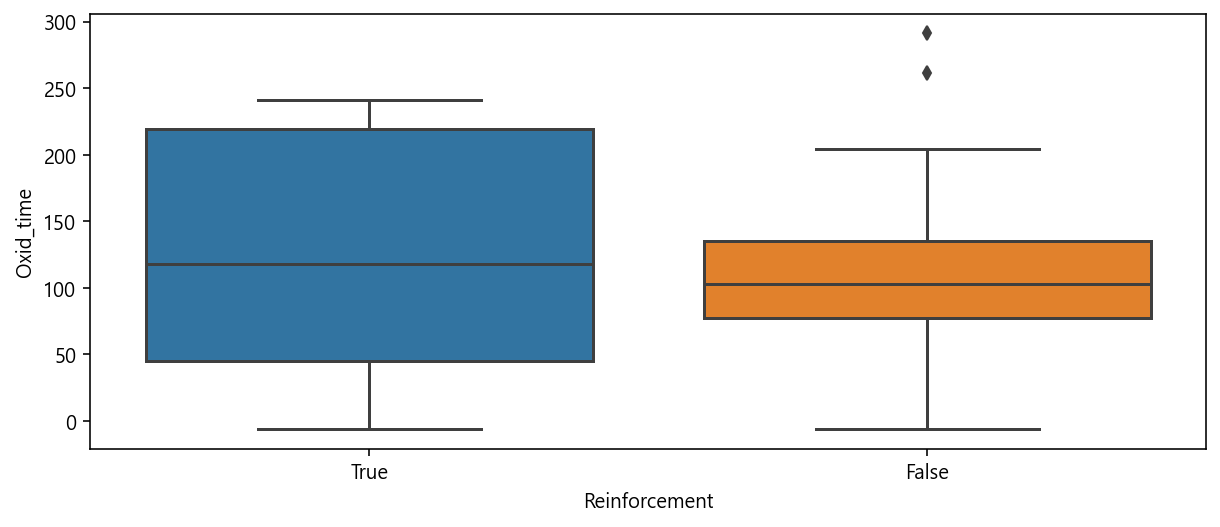

In [46]:
plt.figure(figsize = (10,4))
sns.boxplot(data = df3, x = 'Reinforcement', y = 'Oxid_time', order= ["True","False"])
plt.show()

In [47]:
# - 귀무가설 : 보강 여부에 따라서 Oxidation Time은 유의미한 차이가 없을것이다.
# 대립가설 : 보강 여부에 따라 유의미한 차이가 있을 것이다.

# 1. Oxidataion Time의 정규성 검사 실시

x = stats.shapiro(df3['Oxid_time'])
print("The Shapiro-Wikis Statistics is %.3f and the p-values is %.3f" %x)

t_result = stats.ttest_1samp(df3['Oxid_time'], df3['Oxid_time'].mean())
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("1-sample t-test")
print("t검정통계량 : {}".format(t))
print("p-value : {}".format(p))

The Shapiro-Wikis Statistics is 0.903 and the p-values is 0.000
1-sample t-test
t검정통계량 : 0.0
p-value : 1.0


In [48]:
df3['Oxid_time'].mean()

123.2018779342723

In [49]:
# 15. Oxidation 과정 보강여부에 따른 Oxidation Time의 유의미한 차이 확인

<AxesSubplot:xlabel='Oxid_time', ylabel='Count'>

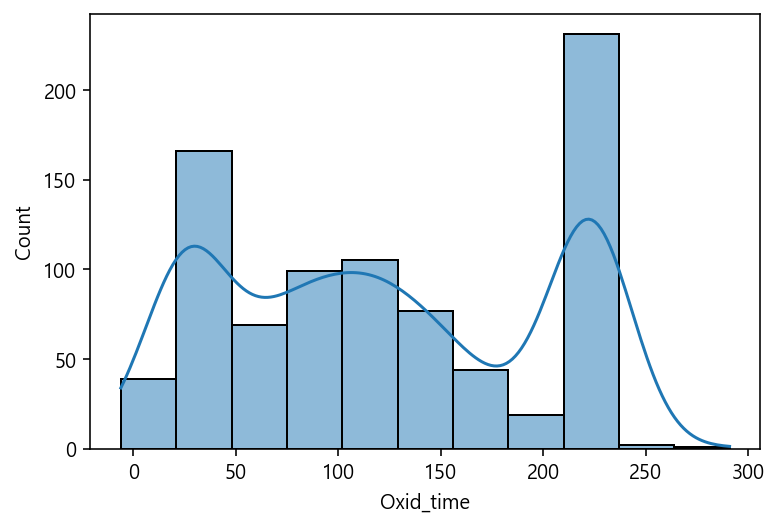

In [50]:

sns.histplot(data = df3, x = 'Oxid_time', kde = True)

In [51]:
# 16, UV Type에 따른 Out of Range의 유의미한 차이 확ㅇ니
# UV Type에 따른 Ot OF Range의 빈도수를 확인.

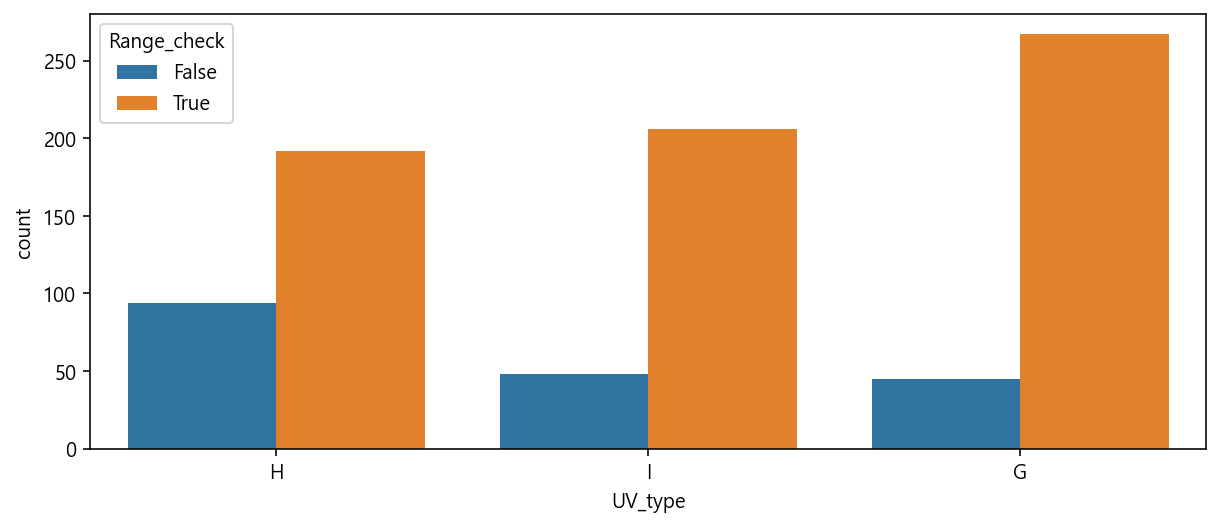

In [52]:
plt.figure(figsize = (10, 4))
sns.countplot(data = df3, x = 'UV_type', hue = 'Range_check')
plt.show()

In [53]:
#17. UV Type 에 따른 Out of Range의 유의미한 차이 확인하기

In [54]:
df3.pivot_table(index = 'UV_type', columns = 'Range_check', aggfunc = 'sum')

Chamber_Num      Energy_Exposure            Etching rate  \
Range_check       False True           False       True        False   
UV_type                                                                
G                    84  515        4860.667  28985.752   140.595333   
H                   178  395       10062.878  20852.485   315.067000   
I                    95  409        5109.861  22111.796   151.465667   

                        Etching_Chamber           Flux160s                ...  \
Range_check        True           False True         False          True  ...   
UV_type                                                                   ...   
G            862.332667              84  515  2.108619e+19  1.188407e+20  ...   
H            636.964333             178  395  3.663495e+19  8.926870e+19  ...   
I            689.714333              95  409  2.330259e+19  9.262148e+19  ...   

            temp_HMDS_bake            temp_softbake             thickness  \
Range_check          False       True         False       True      False   
UV_type                                                                     
G                 9030.885  53822.045      4140.771  24643.123  31898.689   
H                18752.237  38543.442      8557.728  17671.945  67072.686   
I                 9600.124  41246.625      4400.384  18946.764  34144.243   

                        time_HMDS_bake            time_softbake            
Range_check        True          False       True         False      True  
UV_type                                                                    
G            189512.955       4050.006  24030.019      1349.983  8010.194  
H            136614.665       8460.009  17280.013      2820.087  5760.088  
I            146466.404       4319.996  18540.013      1439.990  6180.232  

[3 rows x 94 columns]

In [55]:
#18. Etching Rate와 Target의 상관성을 확인

df_rate = df3[['Etching rate', 'Target']]
df_rate.corr(method = 'pearson')

,Etching rate,Target
Etching rate,1.000000,0.503397
Target,0.503397,1.000000


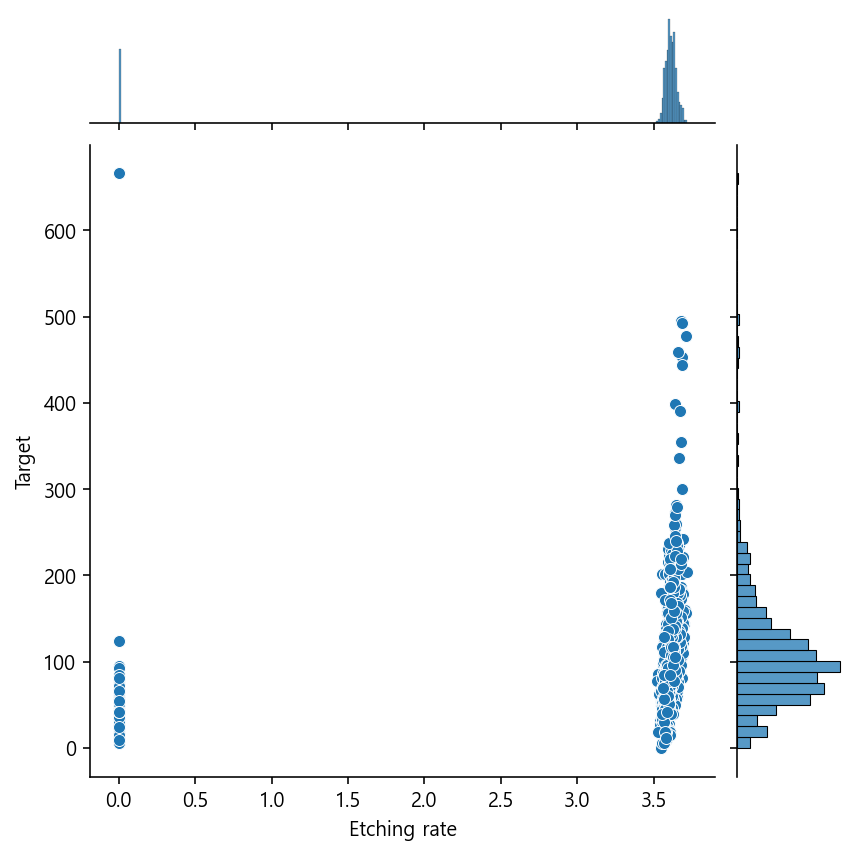

In [56]:
df3.fillna(value = 0, inplace =True)

sns.jointplot(data = df3, x = 'Etching rate', y = 'Target')

#19. 공정 경로 별 Wafer 생산량 계산
s = df3['Chamber Route'].apply(lambda x : x[-5:])
n = len(s)
k = []
m = 0
for data in s :
    m = 0
    for s in range(0, 5) :
        m += int(data[s])
    k.append(m)  

df3['Chamber_Route_Count'] = k

df3.T.head(70)

In [57]:
df_count = df3.pivot_table(index = 'Chamber Route', values = 'Reinforcement', aggfunc ='count').reset_index()

df3['Chamber_Route_Count'].count()
df3.fillna(value = 0)

KeyError: 'Chamber_Route_Count'

In [ ]:
sns.countplot(data= df3, x = 'Chamber Route')